In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
df = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)

In [3]:
df.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:
df.columns=["Message", "Positive"]


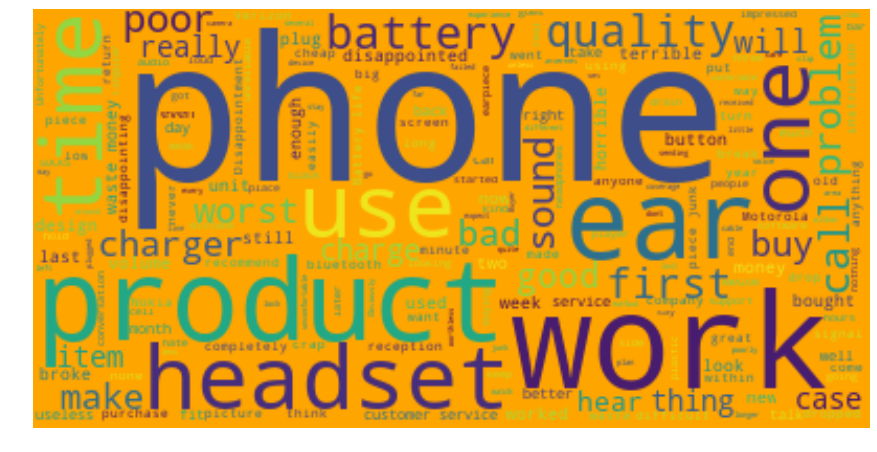

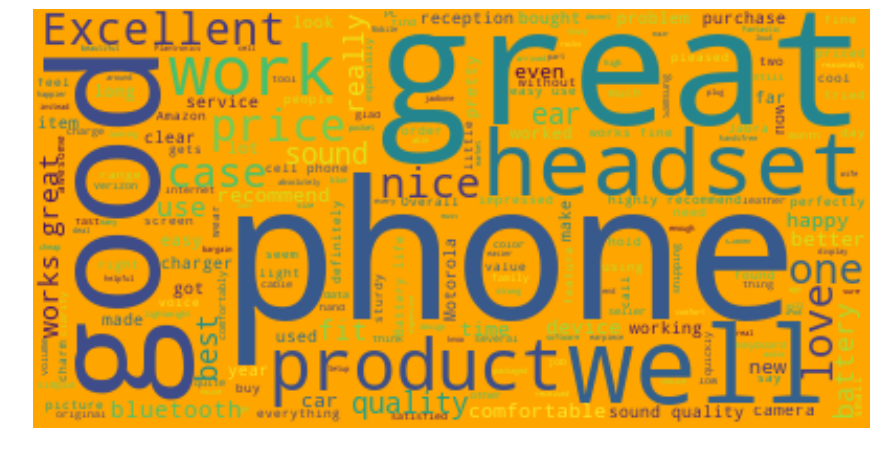

In [5]:
from wordcloud import WordCloud
negativedf = df[df["Positive"] == 0]

positivedf = df[df["Positive"] == 1]

# Generate a word cloud image
wordcloud = WordCloud(background_color="orange").generate(" ".join(negativedf['Message']))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

# Generate a word cloud image
wordcloud = WordCloud(background_color="orange").generate(" ".join(positivedf['Message']))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [6]:
keywords =["good","great", 'best' 'love', 'awesome', 'excellent', 'well','nice','incredible','satisfied', 'comfortable','bad', 'poor','problem','terrible', 'worst', 'horrible','waste', 'disappoint'] 


for k in keywords:
    df[str(k)] = df.Message.str.contains(
         str(k),
        case=False
    )

In [7]:
df["Positive"] = (df["Positive"] == 1)

In [8]:
from sklearn.naive_bayes import BernoulliNB
data = df[keywords]
target = df['Positive']

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 298


In [9]:
from sklearn.metrics import accuracy_score
sklearn.metrics.accuracy_score(target, y_pred)

0.702

Do any of your classifiers seem to overfit?
Which seem to perform the best? Why?
Which features seemed to be most impactful to performance?

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[472,  28],
       [270, 230]])

270 (false positive) out of 298 errors are from failing to identify positive sentiments. While we have 94% accuracy for detecting negative sentiments, we only have 46% accuracy for detecting positive sentiments. We ae not good at catching positive sentiments. 

In [11]:
keywords =["good","great", 'best' 'love', 'awesome', 'excellent', 'well','clear','nice','incredible','satisfied', 'comfortable','recommend','better','fit','quality','easy','bad', 'poor','problem','terrible', 'worst', 'horrible','waste', 'disappoint'] 


for k in keywords:
    df[str(k)] = df.Message.str.contains(
         str(k),
        case=False
    )

from sklearn.naive_bayes import BernoulliNB
data = df[keywords]
target = df['Positive']

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
    

Number of mislabeled points out of a total 1000 points : 267


In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[444,  56],
       [211, 289]])

Now the accuracy for detecting positive sentiments increases to 57.8%

In [13]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.72
Testing on Sample: 0.733


the scores look pretty consistent. doesn't look like our model is overfitting. 

In [14]:
from nltk.stem import WordNetLemmatizer 

In [15]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/christalwu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/christalwu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/christalwu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
results = []
for line in df['Message']:
        results.extend(line.strip().split())

        #print(results)


lemmatized_word = []
for word in results:
    lemmatized_word.append(WordNetLemmatizer().lemmatize(word))

print(lemmatized_word[:60])
print(results[:0])
#def get_wordnet_pos(word):
    #"""Map POS tag to first character lemmatize() accepts"""#
    #tag = nltk.pos_tag([word])[0][1][0].upper()
    #tag_dict = {"J": wordnet.ADJ,
                #"N": wordnet.NOUN,
                #"V": wordnet.VERB,
                #"R": wordnet.ADV}
    #return tag_dict.get(tag, wordnet.NOUN)


#lemmatizer = WordNetLemmatizer()

#print([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(results)])


#lemma_list_of_words= []

#for word in range(0, len(results)):
     #l1 = results[word]
     #l2 = ' '.join([WordNetLemmatizer().lemmatize(word) for word in l1])
     #lemma_list_of_words.append(l2)

#for word in results:
    #lemmatized_word = WordNetLemmatizer().lemmatize(word)

#print(lemma_list_of_words)

# get a list of words from each feedback string using split() method
# lemmatize the words 
# have each lemmatized words back into a string 


['So', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'US', 'unless', 'I', 'go', 'by', 'a', 'converter.', 'Good', 'case,', 'Excellent', 'value.', 'Great', 'for', 'the', 'jawbone.', 'Tied', 'to', 'charger', 'for', 'conversation', 'lasting', 'more', 'than', '45', 'minutes.MAJOR', 'PROBLEMS!!', 'The', 'mic', 'is', 'great.', 'I', 'have', 'to', 'jiggle', 'the', 'plug', 'to', 'get', 'it', 'to', 'line', 'up', 'right', 'to', 'get', 'decent']
['So', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'US', 'unless', 'I', 'go', 'by', 'a', 'converter.', 'Good', 'case,', 'Excellent', 'value.', 'Great', 'for', 'the', 'jawbone.', 'Tied', 'to', 'charger', 'for', 'conversations', 'lasting', 'more', 'than', '45', 'minutes.MAJOR', 'PROBLEMS!!', 'The', 'mic', 'is', 'great.', 'I', 'have', 'to', 'jiggle', 'the', 'plug', 'to', 'get', 'it', 'to', 'line', 'up', 'right', 'to', 'get', 'decent']
